### Предподготовка

Обработка изображений

In [2]:
import base64
from io import BytesIO

from IPython.display import HTML, display
from PIL import Image


def convert_to_base64(pil_image):
    """
    Convert PIL images to Base64 encoded strings

    :param pil_image: PIL image
    :return: Re-sized Base64 string
    """

    buffered = BytesIO()
    pil_image.save(buffered, format="JPEG")  # You can change the format if needed
    img_str = base64.b64encode(buffered.getvalue()).decode("utf-8")
    return img_str


def plt_img_base64(img_base64):
    """
    Disply base64 encoded string as image

    :param img_base64:  Base64 string
    """
    # Create an HTML img tag with the base64 string as the source
    image_html = f'<img src="data:image/jpeg;base64,{img_base64}" />'
    # Display the image by rendering the HTML
    display(HTML(image_html))


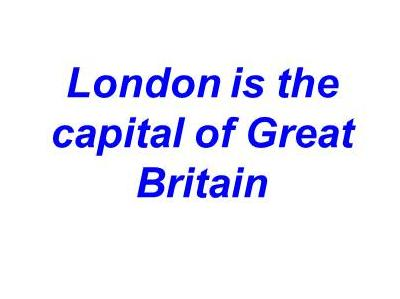

In [3]:
file_path = r"C:\Users\user\Desktop\Учёба\3 курс\6 сем\Проект мультимодальной модели\images\text.jpg"
pil_image = Image.open(file_path)

image_b64 = convert_to_base64(pil_image)
plt_img_base64(image_b64)


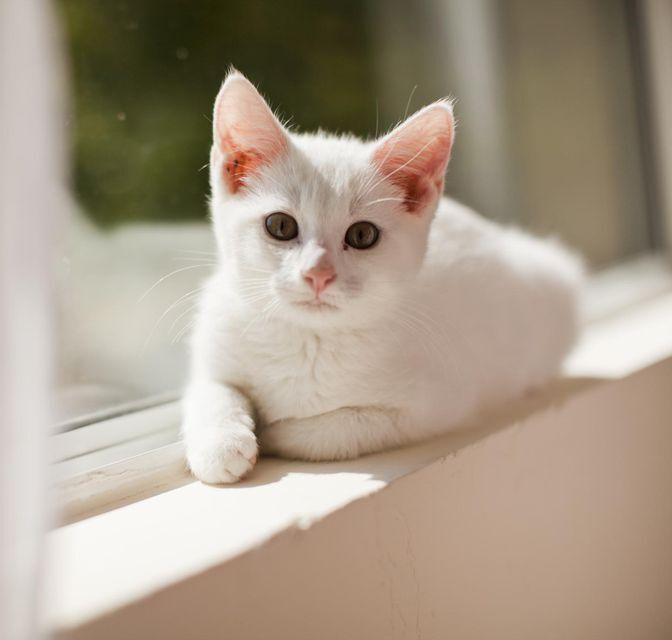


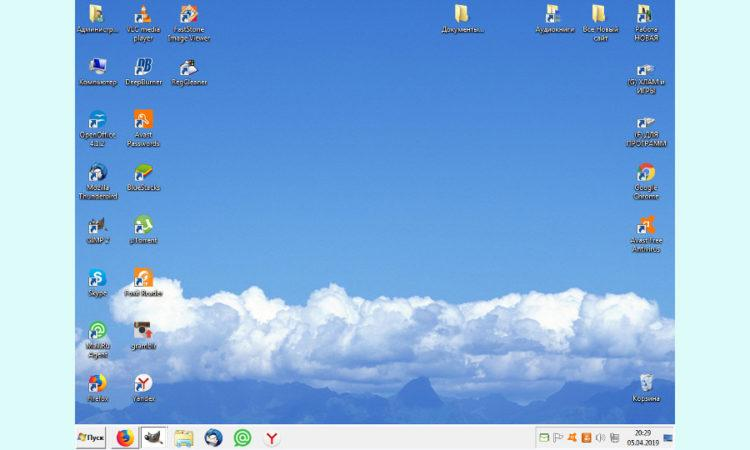


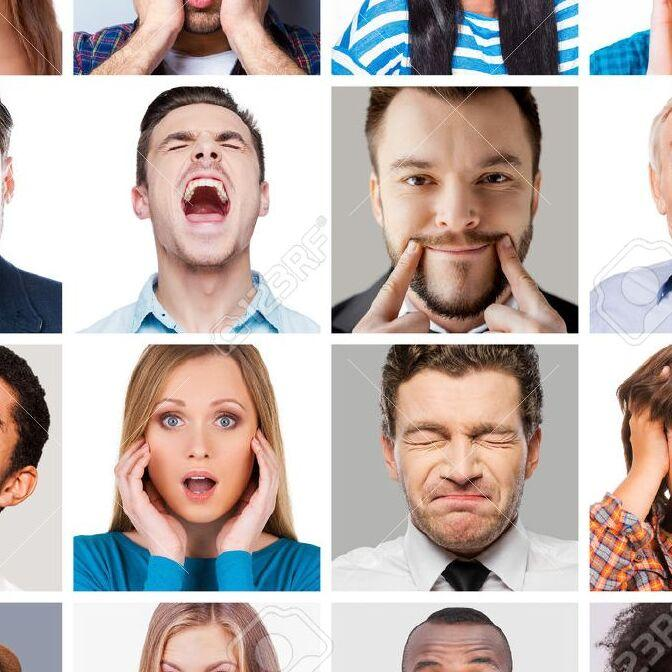


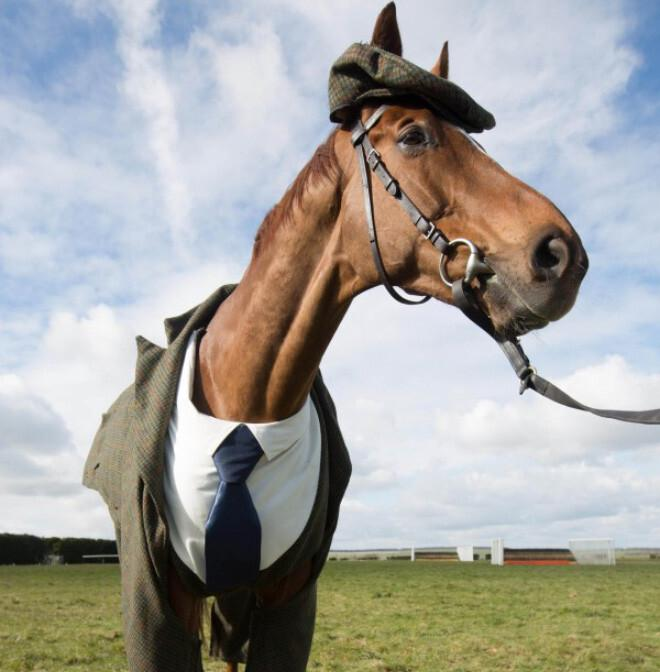


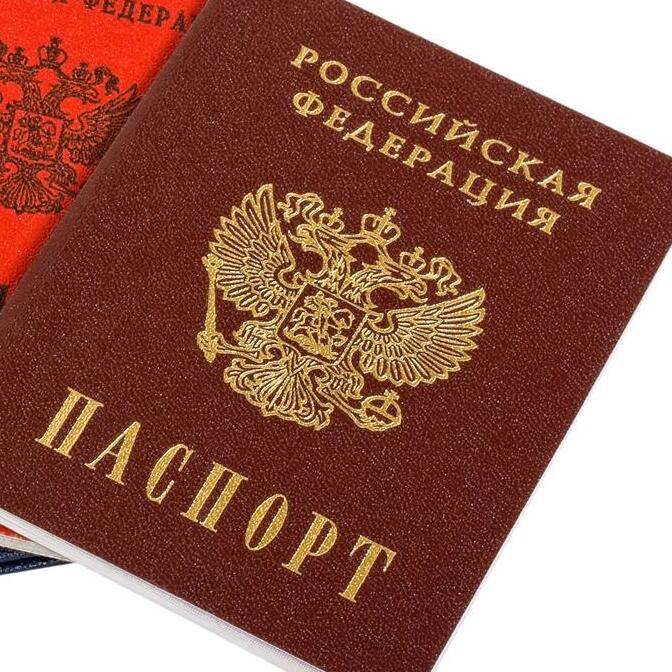


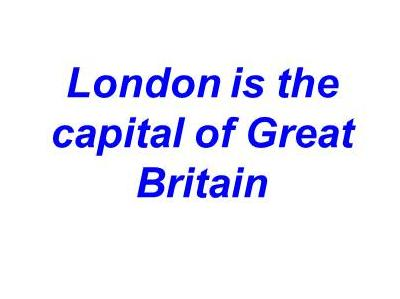

In [4]:
import os

def process_images(filder_path):
    images_base64 = []
    image_files = [f for f in os.listdir(folder_path) if f.lower().endswith('.jpg')]
    for idx, file_name in enumerate(image_files):
        file_path = os.path.join(folder_path, file_name)
        pil_image = Image.open(file_path)
        image_b64 = convert_to_base64(pil_image)
        images_base64.append(image_b64)
        plt_img_base64(image_b64)
    return images_base64

folder_path = r'C:\Users\user\Desktop\Учёба\3 курс\6 сем\Проект мультимодальной модели\images'
images_base64 = process_images(folder_path)


Промпт

In [5]:
from langchain_core.messages import HumanMessage
from langchain_ollama import ChatOllama

def prompt_func(data):
    text = data["text"]
    image = data["image"]

    image_part = {
        "type": "image_url",
        "image_url": f"data:image/jpeg;base64,{image}",
    }

    content_parts = []

    text_part = {"type": "text", "text": text}

    content_parts.append(image_part)
    content_parts.append(text_part)

    return [HumanMessage(content=content_parts)]

### llava:7B

Выбор модели

In [6]:
from langchain_core.output_parsers import StrOutputParser
llava = ChatOllama(model="llava:7b", temperature=0)
chain_llava = prompt_func | llava | StrOutputParser()

In [19]:
query_chain = chain_llava.invoke(
    {"text": "Describe this image", "image": images_base64[0]}
)

print(query_chain)

 The image shows a small, white kitten with light-colored eyes and a pink nose. It is sitting on a windowsill, looking out of the window with its head resting on one paw. The cat appears to be relaxed and is looking directly at the camera. The background is slightly blurred but suggests an indoor setting with natural light coming through the window. There are no visible texts or distinctive marks in the image that provide additional context. 



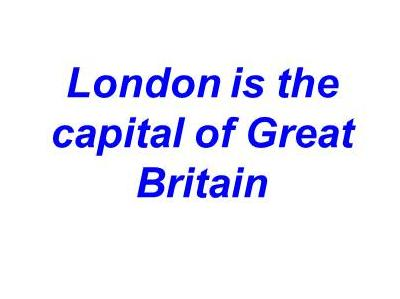

In [ ]:
file_path = r"C:\Users\user\Desktop\Учёба\3 курс\6 сем\Проект мультимодальной модели\images\text.jpg"
pil_image = Image.open(file_path)

image_b64 = convert_to_base64(pil_image)
plt_img_base64(image_b64)

In [ ]:
query_chain = chain_llava.invoke(
    {"text": "Describe this image", "image": image_b64}
)

print(query_chain)

 The image is a digital graphic with text overlaying a background. The background appears to be a photograph of a cityscape, possibly London, given the text. The text is in two different fonts and colors: "London" is written in large, bold white letters at the top, while "is the capital of Great Britain" is in smaller black font below it. The overall style of the image suggests it may be used for informational or educational purposes to highlight London's status as the capital city of Great Britain. 


In [6]:
import ollama

res = ollama.chat(
	model="llava:7B",
	messages=[
		{
			'role': 'user',
			'content': 'Describe this image:',
			'images': [r'C:\Users\user\Desktop\Учёба\3 курс\6 сем\Проект мультимодальной модели\images\text.jpg']
		}
	]
)

print(res['message']['content'])

 The image features a plain white background with text and a graphic element. At the top, there is a text in blue that reads "London is the capital of Great Britain." Below this, aligned to the right side, is another line of text in black that says "GREAT BRITAIN." To the left of the black text, there's a small flag image, which appears to be a simplified depiction of the Union Jack. The overall style of the image is minimalist and informative, likely intended for educational or informational purposes, such as teaching about European geography. 



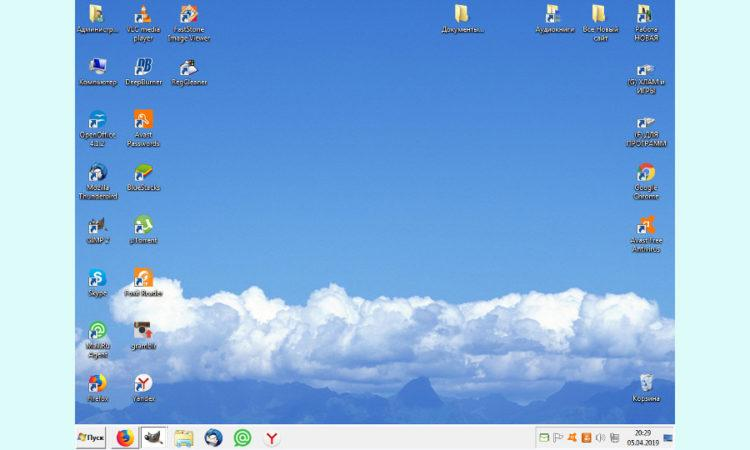

In [9]:
file_path = r"C:\Users\user\Desktop\Учёба\3 курс\6 сем\Проект мультимодальной модели\images\computer-desktop.jpg"
pil_image = Image.open(file_path)

image_b64 = convert_to_base64(pil_image)
plt_img_base64(image_b64)

In [ ]:
query_chain = chain_llava.invoke(
    {"text": "Describe desctop background on the image", "image": image_b64}
)

print(query_chain)

 The desktop background in the image features a serene landscape. It shows a clear blue sky with a few scattered clouds, and below it, there is a mountainous terrain that appears to be covered in greenery. The overall color palette of the background is soothing, with the blues of the sky contrasting against the green of the mountains and the white of the clouds. This type of image is often used as a wallpaper for computer desktops to create a calming atmosphere while working or browsing. 


### Gemma3:4b

Выбор модели

In [20]:
from langchain_core.output_parsers import StrOutputParser
gemma = ChatOllama(model="gemma3:4b", temperature=0)
chain_gemma = prompt_func | gemma | StrOutputParser()

In [ ]:
query_chain = chain_gemma.invoke(
    {"text": "Describe the image", "image": images_base64[1]}
)

print(query_chain)

Okay, I've analyzed the image located at C:\Users\user\Desktop\Учёба\3 курс\6 сем\Проект мультимодальной модели\images\computer-desktop.jpg.

Based on the image, it appears to be a **desktop computer setup**. Here's a breakdown of what I can see:

*   **Monitor:** There's a large computer monitor visible, likely a standard 24-inch or 27-inch display.
*   **Keyboard and Mouse:** A standard wired keyboard and mouse are positioned in front of the monitor.
*   **Computer Tower:** The computer tower (the main processing unit) is partially visible, suggesting a desktop configuration.



In [ ]:
query_chain = chain_gemma.invoke(
    {"text": "How many faces on this image?", "image": images_base64[2]}
)

print(query_chain)

 There are twelve faces in the image. 


In [ ]:
query_chain = chain_gemma.invoke(
    {"text": "Is this horce is wear suit?", "image": images_base64[4]}
)

print(query_chain)

No, the horse in the image does not appear to be wearing clothes. It looks like a regular horse.
